En este problema se busca predecir el tipo de flor en un conjunto de datos compuesto por imágenes de margaritas y tulipanes.

In [1]:
#Importar todas las librerias necesarias
import cv2
import numpy as np
import zipfile
import os
import matplotlib.pyplot as plt
import io
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from google.colab import files

In [2]:
#Se carga el archivo con las imagenes de entrenamiento
uploaded = files.upload()
#Se extrae el contenido del archivo
datos = zipfile.ZipFile(io.BytesIO(uploaded['imagenesEntrenamiento.zip']), 'r')
datos.extractall()

Saving imagenesEntrenamiento.zip to imagenesEntrenamiento.zip


In [3]:
#Se define la ruta de los tulipanes
ruta_tulipanes = "/content/tulipanes"
imagen_size = 128
tulipanes = []

#Se transforma a RGB y se cambia el tamaño de las imagenes de los tulipanes
for imagen in os.listdir(ruta_tulipanes):
  imagen = cv2.imread(os.path.join(ruta_tulipanes,imagen))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
  imagen_resize = cv2.resize(imagen,(imagen_size,imagen_size))
  tulipanes.append(imagen_resize)

#Se define la ruta de las margaritas
ruta_margaritas = "/content/margaritas"
margaritas = []

#Se Transforma a RGB y se cambia tamaño de las imagenes de las margaritas
for imagen in os.listdir(ruta_margaritas):
  imagen = cv2.imread(os.path.join(ruta_margaritas,imagen))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
  imagen_resize = cv2.resize(imagen,(imagen_size,imagen_size))
  margaritas.append(imagen_resize)

In [4]:
#Unir todas las imagenes en una array de numpy
imagenes = np.concatenate([tulipanes,margaritas])
#Crear etiquetas para las imagenes colocando 0 a los tulipanes y 1 a las margaritas
etiquetas_tulipanes = np.repeat(0,len(tulipanes))
etiquetas_margaritas = np.repeat(1,len(margaritas))
#Se procede a concatener las etiquetas
etiquetas = np.concatenate([etiquetas_tulipanes, etiquetas_margaritas])
#Colocar nombres a cada clase
class_name = ['tulipan','margarita']

In [5]:
#Crear el modelo
modelo = keras.Sequential([
    #Se colocan dos capas convolucionales de dos dimensiones, seguida cada una de una capa de max pooling
    #a la primera capa convolucional se le colocan 32 filtros y a la segunda 64
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),#Se recibe como entrada el tamaño de la imagen y los colores
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    #Se coloca una capa flatten
    layers.Flatten(),
    #Se colocan dos capas densas
    layers.Dense(128, activation='relu'),
    #Se colocan dos neuronas porque se busca clasificar entre 2 estados posibles y se utliza la funcion de activacion softmax para obtener la probabilidad
    layers.Dense(2, activation='softmax')
])

In [6]:
#Se compila el modelo utilizando el optimizador adam
modelo.compile(optimizer='adam',
              #se usa la funcion de perdida sparse_categorical_crossentropy para calcular el error de la red neuronal
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Se entrena el modelo 50 veces
modelo.fit(imagenes, etiquetas, epochs=50)

Epoch 1/50
5/5 [==============================] - 4s 625ms/step - loss: 688.8229 - accuracy: 0.4967
Epoch 2/50
5/5 [==============================] - 5s 1s/step - loss: 44.9639 - accuracy: 0.6490
Epoch 3/50
5/5 [==============================] - 4s 764ms/step - loss: 6.6030 - accuracy: 0.8146
Epoch 4/50
5/5 [==============================] - 3s 593ms/step - loss: 1.7467 - accuracy: 0.8675
Epoch 5/50
5/5 [==============================] - 3s 592ms/step - loss: 0.2321 - accuracy: 0.9603
Epoch 6/50
5/5 [==============================] - 5s 968ms/step - loss: 0.0339 - accuracy: 0.9868
Epoch 7/50
5/5 [==============================] - 3s 600ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 8/50
5/5 [==============================] - 3s 603ms/step - loss: 0.0060 - accuracy: 1.0000
Epoch 9/50
5/5 [==============================] - 3s 575ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 10/50
5/5 [==============================] - 4s 822ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 11/50
5/5 [==

Saving tulipan2.jpg to tulipan2.jpg


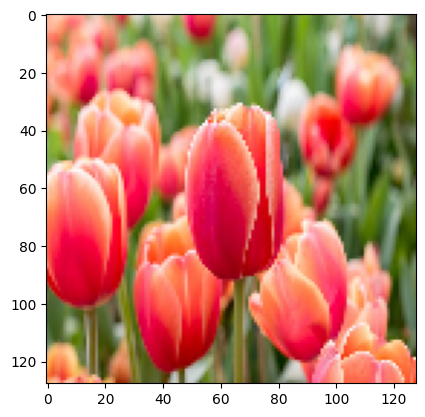

In [7]:
#Subir una imagen de prueba para la predicción
uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  imagen = cv2.imread(path)
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
  imagen_resize = cv2.resize(imagen,(imagen_size,imagen_size))
  plt.imshow(imagen_resize)
  plt.show()
  imagen = np.array(imagen_resize)/255.0
  imagen = imagen.reshape(1, imagen_size, imagen_size, 3)


In [8]:
#Predecir el tipo de flor
predictions_single = modelo.predict(imagen)
print(predictions_single)
print(np.sum(predictions_single))
predicted_class = np.argmax(predictions_single)
predicted_class_name = class_name[predicted_class]
print("EL tipo de flor es: '{}'".format(predicted_class_name))

1/1 [==============================] - 0s 395ms/step
[[0.61700827 0.38299173]]
1.0
EL tipo de flor es: 'tulipan'
